<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/up_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
ad_data = pd.read_csv('test_data.csv', delimiter = ',')

In [0]:
ad_data.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


Since the time is in Unix format, convert it to more readable format.

In [0]:
ad_data['time'] = pd.to_datetime(ad_data['time'],unit='s')

And now let's see how the ad events are distributed throughout the days

In [0]:
ad_dates = ad_data.groupby('date').count()

[Text(0, 0.5, 'Number of ad events'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Distribution of ad events')]

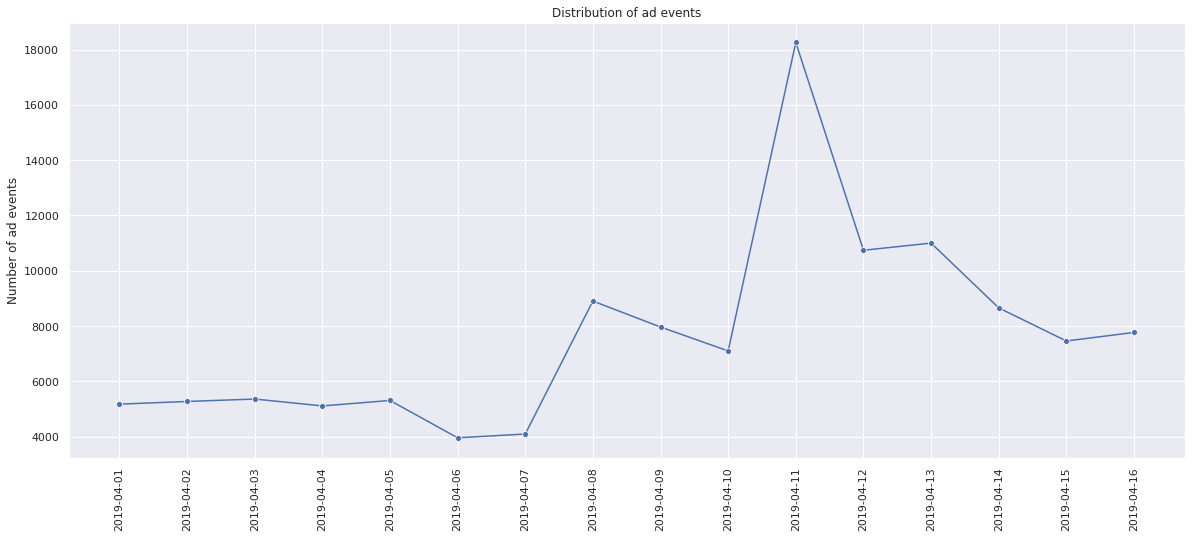

In [0]:
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
fig = sns.lineplot(x=ad_dates.index, y='event', marker='o', data=ad_dates)
fig.set(xlabel='', ylabel='Number of ad events', title="Distribution of ad events")

> Obviously, **2019-04-11** outperforms other days in the number of ad events. 
So, let's inspect unique ad counts which run that day. For convenience we take a look at the descending list





---



In [0]:
ad_counts_11_april = ad_data[ad_data.date == '2019-04-11'].groupby('ad_id').count().sort_values(by=['event'], ascending=False) 
ad_counts_11_april['event'].head()

ad_id
ad_49554    9640
ad_49556    3455
ad_49560     512
ad_49564     334
ad_388       101
Name: event, dtype: int64

The topmost **two ads** 

```
# ad_49554
# ad_49556
```

have the largest share (13k out of 18k) of the ad events of **2019-04-11**, which is quite interesting if you look at the related plot.

[Text(0, 0.5, 'Number of each ad'),
 Text(0.5, 0, 'ad id'),
 Text(0.5, 1.0, 'Distribution of ad events by ad_id on 2019-04-11')]

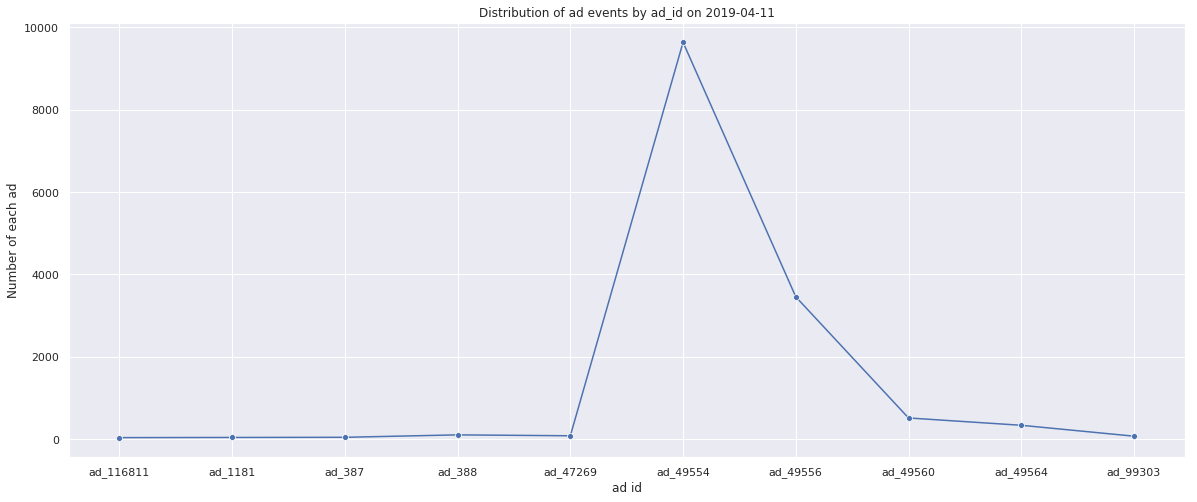

In [0]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x=ad_counts_11_april.iloc[:10].index, y='event', marker='o', data=ad_counts_11_april.iloc[:10]) 
fig.set(xlabel='ad id', ylabel='Number of each ad', title="Distribution of ad events by ad_id on 2019-04-11")

Let's additionally check the whole dataset whether there are any other ads with the big number of events.

In [0]:
ad_data.groupby('ad_id').count().sort_values(by=['event'], ascending=False).head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,platform,date
ad_id,,,,,,,,,
ad_49554,27500,27500,27500,27500,27500,27500,27500,27500,27500
ad_49556,8218,8218,8218,8218,8218,8218,8218,8218,8218
ad_49560,7496,7496,7496,7496,7496,7496,7496,7496,7496
ad_49564,4491,4491,4491,4491,4491,4491,4491,4491,4491
ad_47269,1867,1867,1867,1867,1867,1867,1867,1867,1867


We can see that our two ads are still the topmost, but there is another ad with similarly big event count number

```
# ad_49560
```
We can take this ad into consideration with the other two.

And now we want to see whether those three ads were popular before or after **2019-04-11**. Starting from the topmost ad_49554.


In [0]:
ad_1 = ad_data[ad_data.ad_id == 'ad_49554'].groupby('date').count().sort_values(by=['date'], ascending=True)

In [0]:
ad_1['event']

date
2019-04-10     272
2019-04-11    9640
2019-04-12    4868
2019-04-13    6275
2019-04-14    3693
2019-04-15    2364
2019-04-16     388
Name: event, dtype: int64

We see that the ad_49554 started on 2019-04-10 and run for a week. It peeked for a day, i.e. 2019-04-11 and if we consider popularity margin as 3000 events, then the ad was popular for 4 days. 

In [0]:
ad_2 = ad_data[ad_data.ad_id == 'ad_49556'].groupby('date').count().sort_values(by=['date'], ascending=True)

In [0]:
ad_2['event']

date
2019-04-11    3455
2019-04-12    1492
2019-04-13     999
2019-04-14     804
2019-04-15     552
2019-04-16     916
Name: event, dtype: int64

The second ad under ad_id 49556 run for 6 days and was popular for 1 day (remember our presumed popularity margin=3000 events)

In [0]:
ad_3 = ad_data[ad_data.ad_id == 'ad_49560'].groupby('date').count().sort_values(by=['date'], ascending=True)

In [0]:
ad_3['event']

date
2019-04-05     117
2019-04-08    2940
2019-04-09    1867
2019-04-10    1035
2019-04-11     512
2019-04-12     193
2019-04-13     170
2019-04-14     211
2019-04-15     197
2019-04-16     254
Name: event, dtype: int64

The last ad run for 10 days and was shortly popular hardly reaching popularity margin on 2019-04-08. 
If we look at our [first plot](https://colab.research.google.com/drive/1vsfAt-IL-tKe0um63Mk-SvejYSYOWUYW#scrollTo=VhqoXPD5pk2y&line=4&uniqifier=1) "Distribution of ad events" we can see that exactly on 2019-04-08 our distribution started growing over mean number of events. This ad contributed to this.

[Text(0, 0.5, 'Number of events'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Distribution of top three ads')]

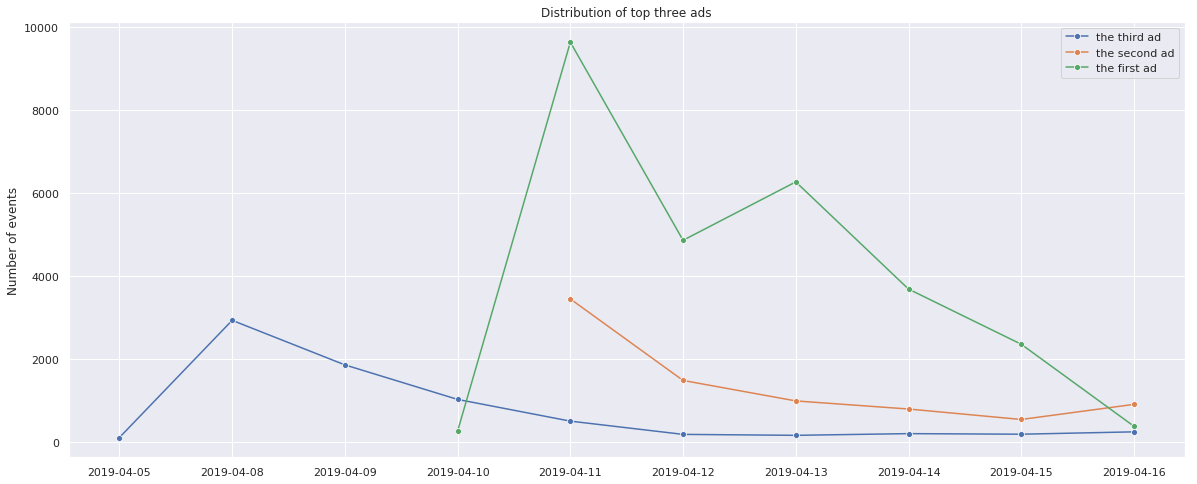

In [0]:
plt.figure(figsize=(20,8))
sns.lineplot(x=ad_3.index, y='event', marker='o', data=ad_3, label="the third ad")
sns.lineplot(x=ad_2.index, y='event', marker='o', legend="brief",data=ad_2, label="the second ad")
sns.lineplot(x=ad_1.index, y='event', marker='o', data=ad_1, label="the first ad").set(xlabel='', ylabel='Number of events', title="Distribution of top three ads")


Now we can check who run these popular ads. Getting the first 10 results whould be enough to see all three owners.

In [0]:
ad_123 = ad_data.loc[ad_data['ad_id'].isin(['ad_49554','ad_49556','ad_49560'])]
ad_123.iloc[:10]

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
11,2019-04-13 15:36:18,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-13
14,2019-04-14 14:25:21,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-14
19,2019-04-11 19:30:01,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
20,2019-04-12 09:25:06,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-12
22,2019-04-11 10:08:03,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
23,2019-04-12 11:11:03,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49556,android,2019-04-12
24,2019-04-16 06:21:55,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-16
25,2019-04-11 06:31:51,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,android,2019-04-11
27,2019-04-12 09:29:30,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-12
35,2019-04-13 16:31:45,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49556,android,2019-04-13


**All three ads belong to client_47270** under agency_2. Glancing at the last three rows is enough to see it.

The first assumption is that the client_47270 started some campaign, where one of the ads became popular. 

Now we have to understand the properties which made the ad popular. Let's look at the platform, event type, has video, ad cost type properties.

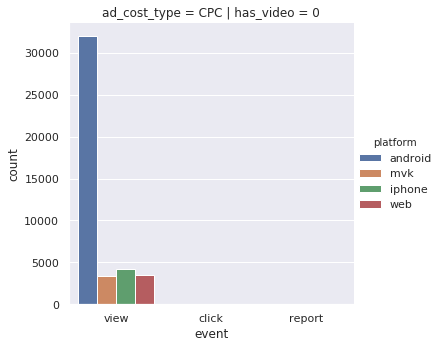

In [0]:
sns.catplot(x='event',hue='platform', col='has_video', row = 'ad_cost_type', kind='count', data=ad_123)

So three ads were all CPC and without videos, were mostly viewen and usually through Android application.

This means **client_47270 run three no-video ads through Android app, paying for each click, which led to an increase in the number of ad events**. 

This also can be interpreted as follows, client_47270 has created the ads which had all ''popular'', i.e. with the most number of events, properties of the dataset. Such as, has_video=0, ad_cost_type=CPC, event=view, platform=android (second row first graph below).
Addressing each property made these three targeted ads successful.

<Figure size 1440x1440 with 0 Axes>

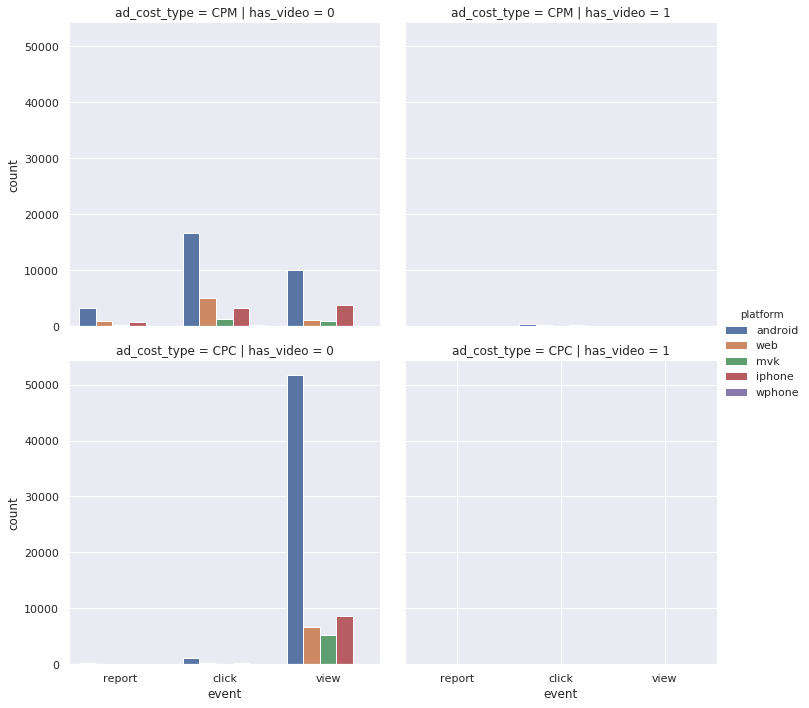

In [0]:
plt.figure(figsize=(20,20))
sns.catplot(x='event',hue='platform', col='has_video', row = 'ad_cost_type', kind='count', data=ad_data)

In [0]:
ad_time = ad_data.set_index('time')

In order to detect anomaly in the number of events, we run detector for the past day, hour or 5 minutes. The following code calculates the number of events for the past day. For the past hour the condition should be 

```
# ad_time.index.hour == pd.Timestamp.now().hour-1
```
And for the past 5 min the condition should be 

```
# (pd.Timestamp.now().minute-5):(pd.Timestamp.now().minute)
```





In [0]:
yesterday_count = ad_time[ad_time.index.day == pd.Timestamp.now().day-1].count()['event']

Then find the number of event counts per day. Find mean.
For the past hour  and 5 minutes use these respectively
```   
# 'H'
```
```
# 'M'
```





In [0]:
ad_time_resampled = ad_time.resample('D')['event'].count()
mean = ad_time_resampled.mean()

Set some custom threshold for triggerring notification. Check both cases: threshold case, mean case. Anything greater than either will set a boolean True and thus trigger the notification.

In [0]:
threshold = 4000
notify = (yesterday_count >= mean) | (yesterday_count>=threshold) 
notify

False